In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#don't run this part
%cd gdrive/My\ Drive/data

/content/gdrive/My Drive/data


In [3]:
#ignore this part
!nvidia-smi

Mon Oct 25 14:07:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
#1
# Importing the libraries
import nltk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from tqdm import tqdm

In [10]:
def classFreqPlot(y):
  y = pd.DataFrame(y)
  classFreq = y[0].value_counts()
  print(classFreq)
  classFreq.plot.barh()
  plt.show()

In [49]:
RNADf = pd.read_csv('train_data.csv')
RNADf.dropna(inplace=True)
print(RNADf.shape)
RNADs = RNADf.to_numpy()
RNADf.head()
# classFreqPlot(y)

(36891, 2)


label           Sequence
0      0  PFGPEMTNPLREIDKTV
1      0  EKNYSHQVGNYHMGFLV
2      0  KQHGEFALLTIEEESLF
3      0  VTYFLQCLRTEKLENYF
4      1  XXXXXRYLMDPDTFTSN

In [50]:
# only run this for performing undersampling
ones = len(RNADf[RNADf['label'] == 1])
print(ones)
zerosInd = RNADf[RNADf.label == 0].index
print(zerosInd)
random_indicesOfZeros = np.random.choice(zerosInd,ones, replace=False) # 2*ones means 0's will be twice as ones
oneIndices = RNADf[RNADf.label == 1].index
under_sample_indices = np.concatenate([oneIndices,random_indicesOfZeros])
under_sampleDf = RNADf.loc[under_sample_indices]
RNADs = under_sampleDf.to_numpy()

1801
Int64Index([    0,     1,     2,     3,     5,     6,     7,     8,     9,
               10,
            ...
            36880, 36881, 36882, 36884, 36885, 36886, 36887, 36888, 36889,
            36890],
           dtype='int64', length=35090)


In [51]:
X = RNADs[:,1]
y = RNADs[:,0]

## converting seq into features

### using one hot encoding

1    1801
0    1801
Name: 0, dtype: int64


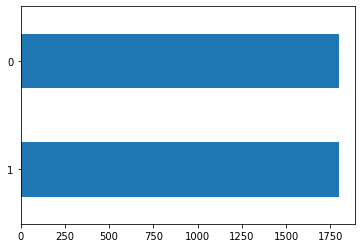

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [52]:
ch=['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y','X']
newX = []
for s in range(len(X)):
  seq = X[s]
  temp = []
  for letter in seq:
    for i in ch:
      if(i == letter):
        temp.append(1)
      else:
        temp.append(0)
  newX.append(temp)
X = newX
classFreqPlot(y)
print(X[:2])

### using dictionary (indexing of letter pair and triplets)
for eg: ECAE would become 1,1,0,2,0,0,0,,,, (E is twice), similarly for pairs and trip


{'A': 0, 'C': 1, 'D': 2, 'E': 3, 'F': 4, 'G': 5, 'H': 6, 'I': 7, 'K': 8, 'L': 9, 'M': 10, 'N': 11, 'P': 12, 'Q': 13, 'R': 14, 'S': 15, 'T': 16, 'V': 17, 'W': 18, 'Y': 19, 'X': 20, 'XX': 21, 'LL': 22, 'LK': 23, 'LE': 24, 'KL': 25, 'EL': 26, 'AL': 27, 'XXX': 28, 'LLL': 29, 'LKK': 30, 'LEE': 31, 'KLL': 32}


100%|██████████| 36891/36891 [00:02<00:00, 17435.55it/s]


(36891, 33)
['KLEYEEIALDLTPVIEE']
[[1. 0. 1. 5. 0. 0. 0. 2. 1. 3. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
  1. 1. 0. 1. 0. 0. 0. 1. 1.]]
0    35090
1     1801
Name: 0, dtype: int64


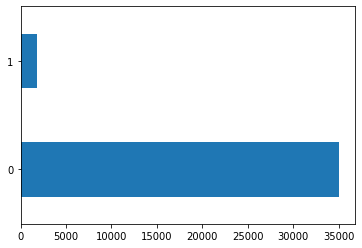

In [88]:
#converting features from 1 column to 20 columns 
npairs = 7
ntriplets = 5
letters = 21
lettInd = {'A': 0, 'C':1, 'D':2 , 'E':3 , 'F':4 , 'G':5, 'H':6, 'I':7 , 'K':8, 'L':9, 'M':10 , 'N':11 ,'P':12 , 'Q':13 , 'R':14 , 'S':15 , 'T':16, 'V':17, 'W':18, 'Y':19, 'X':20 }
newX = np.empty((len(X), ntriplets+npairs+letters))
pairs = {}
triplets = {}
for i in range(len(X)):
  x = X[i]
  for j in range(len(x)-1):
    a = x[j]; b = x[j+1]
    # if(a != "X" and b != "X"):
    if(a+""+b in pairs):
      pairs[a+""+b] += 1
    else:
      pairs[a+""+b] = 1
  for j in range(len(x)-2):
      a = x[j]; b = x[j+1]; c = x[j+1]
      # if(a != 'X' and b != 'X' and x != 'X'):
      if(a+""+b+""+c in triplets):
        triplets[a+""+b+""+c] += 1
      else:
        triplets[a+""+b+""+c] = 1
pairs = dict(sorted(pairs.items(), key=lambda item: item[1], reverse = True))
triplets = dict(sorted(triplets.items(), key=lambda item: item[1], reverse = True))
pairsKeys = list(pairs.keys())
tripletsKeys = list(triplets.keys())
# print(pairsKeys)
# print(tripletskeys)
for i in range(npairs):
  lettInd[pairsKeys[i]] = letters+i
for i in range(ntriplets):
  lettInd[tripletsKeys[i]] = letters+npairs+i     
print(lettInd)   
for i in tqdm(range(len(X))):
  x = X[i]
  temp = np.zeros(ntriplets+npairs+letters)
  for j in x:
    # if(j != 'X'):
    index = lettInd[j]
    temp[index] += 1
  for j in range(len(x)-1):
      a = x[j]; b = x[j+1]
      # if(a != "X" and b != "X"):
      if(a+""+b in lettInd):
        index = lettInd[a+""+b]
        temp[index] += 1
  for j in range(len(x)-2):
      a = x[j]; b = x[j+1]; c = x[j+1]
      # if(a != 'X' and b != 'X' and x != 'X'):
      if(a+""+b+""+c in lettInd):
        index = lettInd[a+""+b+""+c]
        temp[index] += 1
 
  
  newX[i] = temp
      
print(newX.shape)
print(X[29:30])
print(newX[29:30])
# print(np.sum(newX[:,21]))
oldX = X
X = newX
classFreqPlot(y)

In [89]:
print(pairs)
print(lettInd)   
n_features = 20+npairs+ntriplets
print(np.sum(newX[:,n_features]))

{'XX': 8263, 'LL': 5420, 'LK': 4655, 'LE': 4589, 'KL': 4520, 'EL': 4451, 'AL': 4008, 'LS': 3856, 'KE': 3844, 'LR': 3824, 'RL': 3703, 'EE': 3664, 'SL': 3648, 'LA': 3538, 'EK': 3517, 'LV': 3509, 'VL': 3380, 'GL': 3379, 'LQ': 3279, 'KK': 3181, 'LG': 3137, 'DL': 3111, 'RK': 3104, 'QL': 3095, 'TL': 3063, 'LD': 2936, 'LI': 2915, 'IL': 2911, 'ER': 2904, 'LT': 2892, 'KA': 2863, 'LP': 2808, 'EV': 2784, 'GK': 2707, 'AK': 2674, 'EA': 2666, 'RR': 2663, 'EI': 2602, 'FL': 2597, 'AV': 2597, 'KV': 2589, 'AE': 2575, 'NL': 2572, 'SE': 2541, 'SS': 2510, 'SK': 2509, 'PL': 2506, 'KG': 2506, 'AA': 2499, 'VA': 2495, 'KR': 2492, 'RE': 2460, 'VK': 2418, 'GS': 2405, 'LN': 2389, 'IK': 2386, 'GI': 2377, 'SA': 2375, 'GR': 2362, 'VE': 2356, 'KS': 2353, 'SV': 2345, 'VR': 2309, 'VV': 2289, 'KI': 2274, 'VT': 2268, 'LF': 2256, 'KD': 2256, 'SG': 2253, 'RA': 2238, 'IS': 2235, 'AS': 2214, 'RV': 2193, 'ES': 2185, 'AR': 2179, 'PE': 2160, 'KT': 2155, 'VS': 2151, 'GE': 2149, 'VG': 2132, 'RS': 2094, 'QA': 2077, 'RI': 2073, 'IA

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    5403
0    5403
Name: 0, dtype: int64


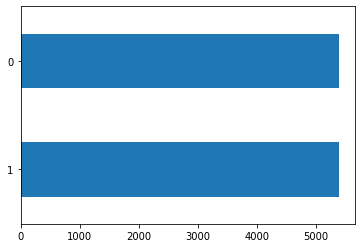

[[0. 0. 2. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 2. 0. 0. 1. 5. 4. 0. 0.
  0. 0. 0. 0. 4. 0. 0. 0. 0.]
 [3. 0. 0. 1. 0. 2. 0. 0. 0. 0. 0. 0. 1. 3. 0. 1. 3. 1. 0. 1. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 3. 1. 0. 0. 1. 1. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 7. 5. 0. 0.
  0. 0. 0. 0. 5. 0. 0. 0. 0.]]


In [ ]:
# run this for performing upsampling (may take around 41 sec)
# from imblearn.over_sampling import SMOTE 
# sm = SMOTE(random_state = 2, k_neighbors=5, sampling_strategy = 1, n_jobs = -1) 
# X, y = sm.fit_sample(X, y)
# classFreqPlot(y)
# print(X[:3])

### self written code for oversampling (don't run)
as undersampling performing better 

In [ ]:
# print(X[:10])
# print(y[:10])
# newX = []
# for i in range(len(X)):
#   if(y[i] == 1):
#     for j in range(20):
#       newX.append([X[i], y[i]])
#   else:
#     newX.append([X[i], y[i]])
# import random
# random.shuffle(newX)
# for i in range(len(X)):
#   X[i] = newX[i][0]
#   y[i] = newX[i][1]
# classFreqPlot(y)
# print(X[:10])
# print(y[:10])

### for feature selection 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier 
RFclf = RandomForestClassifier(max_depth = 27, bootstrap = True, n_estimators = 100, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)
selector = RFE(RFclf, n_features_to_select=30, step=1)
selector = selector.fit(X, y)
selector.support_

In [ ]:
selector.ranking_

In [ ]:
# X = X[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,34]] #choosing feature accordingly

In [ ]:
# #skip this part (not a good way of undersampling)
# from imblearn.under_sampling import NearMiss
# # define the undersampling method
# undersample = NearMiss(version = 1 , n_neighbors=5, random_state=1,sampling_strategy=0.8)
# X, y = undersample.fit_resample(X, y)
# print(len(y))
# print(sum(y))
# classFreqPlot(y)

In [ ]:
# # #for feature reduction (not needed)
# from sklearn.decomposition import PCA
# pca=PCA(5) # else some column will have std as 0 and due to which divide by 0 error
# pcaX=pca.fit_transform(X)
# print("Features after PCA:",len(pcaX[0]))
# X = pcaX

Features after PCA: 5


In [61]:
y = y.astype('i')

## checking for validation score using training and test data

0    1207
1    1206
Name: 0, dtype: int64


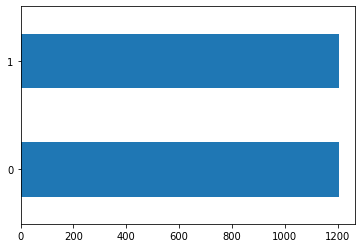

1    595
0    594
Name: 0, dtype: int64


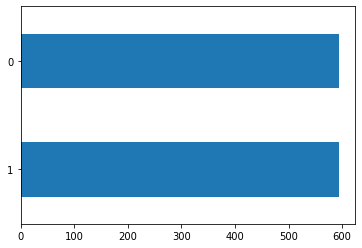

In [53]:
#data splitting for cross validation and grid search

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y, random_state=37)
y_train = y_train.astype('i')
y_test  = y_test.astype('i')
#classFreq after trian test split
classFreqPlot(y_train)
classFreqPlot(y_test)

In [ ]:
# ##TSNE for visualization (dont run this section)
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()#,stop_words=stop_words
# X_trainT = vectorizer.fit_transform(X_train)
# X_testT  = vectorizer.transform(X_test)

(1500, 3)
[11.43573475 33.54372406  0.        ]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


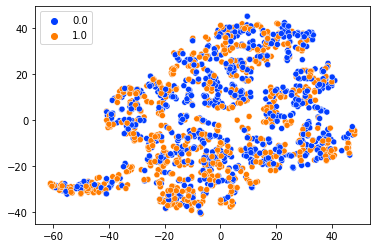

In [ ]:
#no need to run it again
from sklearn.manifold import TSNE
tX_train = TSNE(n_components=2).fit_transform(X_train[:1500]) #taking only first 5000 data for visualization

#adding the label
matYtrain = np.mat(y_train[:1500]).transpose()
XY_train = np.array(np.hstack((tX_train, matYtrain)),dtype = float)
print(XY_train.shape)
print(XY_train[2])
import seaborn as sns
sns.scatterplot(XY_train[:,0],XY_train[:,1],hue=XY_train[:,2], palette="bright")

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)

y_pred = MNBclf.predict(X_test)

print("Accuracy: ",accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))


Accuracy:  0.6232127838519764
[[396 198]
 [250 345]]
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       594
           1       0.64      0.58      0.61       595

    accuracy                           0.62      1189
   macro avg       0.62      0.62      0.62      1189
weighted avg       0.62      0.62      0.62      1189



In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

LOGclf = LogisticRegression(random_state=0, n_jobs = -1, max_iter = 100, verbose= 2)
LOGclf.fit(X_train, y_train)
y_pred = LOGclf.predict(X_test)

#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Testing accuracy: 0.6139613120269134


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


In [28]:
from sklearn.neighbors import KNeighborsClassifier #take more than 3 min (1m2s 75), (27m, 90.8%)
KNNclf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',n_jobs = -1)
KNNclf.fit(X_train, y_train)
# Predicting the Test set results
y_pred = KNNclf.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)

Testing accuracy: 0.5862068965517241


In [ ]:
from sklearn.neighbors import KNeighborsClassifier #take more than 3 min (1m2s 75)
KNNclf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',n_jobs = -1)
KNNclf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
GNBclf.fit(X_train, y_train)
y_pred = GNBclf.predict(X_test)

print("Accuracy: ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy:  0.5849691531127313
[[721 468]
 [272 322]]
              precision    recall  f1-score   support

           0       0.73      0.61      0.66      1189
           1       0.41      0.54      0.47       594

    accuracy                           0.58      1783
   macro avg       0.57      0.57      0.56      1783
weighted avg       0.62      0.58      0.60      1783



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
SVMclf = SVC(probability=False,random_state=1, kernel='rbf')
SVMclf.fit(X_train, y_train)
# Predicting the Test set results
y_pred = SVMclf.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)

Testing accuracy: 0.7240605720695457


### grid search cv for random forest hyper parameter tuning

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
grid_param = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 9, 16, 50, 75],
    'criterion': ['gini'],
    'bootstrap': [True]
}

gdsrcv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_param, scoring='accuracy', cv=4, n_jobs=-1)
gdsrcv.fit(X_train, y_train)
best_parameters = gdsrcv.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 9, 'n_estimators': 200}


### for cross validation 

In [ ]:
# for cross validation so that model doesn't overfit 
from sklearn.model_selection import cross_val_score, cross_val_predict
model=RandomForestClassifier()
predictions = cross_val_score(model, X_train, y_train, cv=5)

In [29]:
from sklearn.ensemble import RandomForestClassifier  #5s 78%
RFclf = RandomForestClassifier(max_depth = 16, bootstrap = True, n_estimators = 300, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 2)
RFclf.fit(X_train, y_train)

y_pred = RFclf.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#12>89.44
#20>95.7
#100, 40, 95.8
#100, 35, 95.88
#100, pca30, 92
#100, w/oPcA 400, 96.03

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.2s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    0.8s


building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300building tree 174 of 300

building tree 175 of 300building tree 176 of 300

building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


Testing accuracy: 0.6543313708999159
[[463 131]
 [280 315]]
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       594
           1       0.71      0.53      0.61       595

    accuracy                           0.65      1189
   macro avg       0.66      0.65      0.65      1189
weighted avg       0.66      0.65      0.65      1189



In [ ]:
from sklearn.ensemble import RandomForestClassifier #1000 4min, 3000 17 min 
RFclf = RandomForestClassifier(max_depth = 39, bootstrap = True, n_estimators = 500, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 2)
RFclf.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500building tree 14 of 500

building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.1s


building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   12.8s


building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500
building tree 200 of 500
building tree 201 of 500


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   29.0s


building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500building tree 396 of 500

building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   39.8s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=39, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=2,
                       warm_start=False)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 300, criterion = 'gini', n_jobs = -1,max_samples=0.8,max_features=31,random_state=37, verbose = 2)
ETclf.fit(X, y)

y_pred = ETclf.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#12>89.44
#20>95.7
#100, 40, 95.8
#100, 35, 95.88
#100, pca30, 92
#100, w/oPcA 400, 96.03

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 300building tree 2 of 300

building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300building tree 10 of 300

building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300building tree 34 of 300

building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.4s


building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300building tree 54 of 300

building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80 of 300
building tree 81

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    1.7s


building tree 179 of 300

building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.2s finished


Testing accuracy: 0.9983174425126192
[[1186    3]
 [   0  594]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1189
           1       0.99      1.00      1.00       594

    accuracy                           1.00      1783
   macro avg       1.00      1.00      1.00      1783
weighted avg       1.00      1.00      1.00      1783



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 300, criterion = 'gini', n_jobs = -1,max_samples=0.8,max_features=31,random_state=37, verbose = 2)
ETclf.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.9s


building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   12.4s


building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500
building tree 200 of 500
building tree 201 of 500


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   28.4s


building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   39.4s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=39, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=2,
                       warm_start=False)

In [ ]:
from sklearn.neural_network import MLPClassifier #(1m 48s 70)
MLPclf = MLPClassifier(batch_size = 512, early_stopping=True, hidden_layer_sizes=(256,128,64,32,16), random_state=37 ,max_iter=350, learning_rate_init=0.01, tol=0.0000001,n_iter_no_change = 20, verbose = True)
MLPclf.fit(X_train, y_train)
# Predicting the Test set results
# print(X_train.shape)
y_pred = MLPclf.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)

Iteration 1, loss = 0.66132039
Validation score: 0.665746
Iteration 2, loss = 0.61810478
Validation score: 0.712707
Iteration 3, loss = 0.61530492
Validation score: 0.665746
Iteration 4, loss = 0.59302808
Validation score: 0.723757
Iteration 5, loss = 0.57407249
Validation score: 0.729282
Iteration 6, loss = 0.56090576
Validation score: 0.732044
Iteration 7, loss = 0.53074141
Validation score: 0.743094
Iteration 8, loss = 0.49634750
Validation score: 0.754144
Iteration 9, loss = 0.45966426
Validation score: 0.748619
Iteration 10, loss = 0.43498429
Validation score: 0.759669
Iteration 11, loss = 0.39510049
Validation score: 0.729282
Iteration 12, loss = 0.35738440
Validation score: 0.734807
Iteration 13, loss = 0.33676985
Validation score: 0.737569
Iteration 14, loss = 0.29274369
Validation score: 0.726519
Iteration 15, loss = 0.27764750
Validation score: 0.704420
Iteration 16, loss = 0.24328909
Validation score: 0.715470
Iteration 17, loss = 0.22741842
Validation score: 0.734807
Iterat

In [ ]:
from sklearn.neural_network import MLPClassifier #(1m 48s 70)
MLPclf = MLPClassifier(batch_size = 512, early_stopping=True, hidden_layer_sizes=(256,128,64,32,16), random_state=37 ,max_iter=350, learning_rate_init=0.01, tol=0.0000001,n_iter_no_change = 10, verbose = True)
MLPclf.fit(X, y)

Iteration 1, loss = 0.54768095
Validation score: 0.817184
Iteration 2, loss = 0.34176088
Validation score: 0.883585
Iteration 3, loss = 0.26247484
Validation score: 0.910373
Iteration 4, loss = 0.20912012
Validation score: 0.916785
Iteration 5, loss = 0.18225001
Validation score: 0.932602
Iteration 6, loss = 0.15920985
Validation score: 0.932032
Iteration 7, loss = 0.14712307
Validation score: 0.939014
Iteration 8, loss = 0.12993084
Validation score: 0.948988
Iteration 9, loss = 0.12546995
Validation score: 0.946708
Iteration 10, loss = 0.11506929
Validation score: 0.955115
Iteration 11, loss = 0.10806080
Validation score: 0.955400
Iteration 12, loss = 0.09947976
Validation score: 0.951981
Iteration 13, loss = 0.09171885
Validation score: 0.955543
Iteration 14, loss = 0.08869258
Validation score: 0.960103
Iteration 15, loss = 0.08282324
Validation score: 0.955258
Iteration 16, loss = 0.08011055
Validation score: 0.959533
Iteration 17, loss = 0.07516489
Validation score: 0.958963
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size=512, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(256, 128, 64, 32, 16),
              learning_rate='constant', learning_rate_init=0.01, max_fun=15000,
              max_iter=350, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=37,
              shuffle=True, solver='adam', tol=1e-07, validation_fraction=0.1,
              verbose=True, warm_start=False)

In [ ]:
from xgboost import XGBClassifier #(1m 14s 78)
XGBclf = XGBClassifier(max_depth = 16, n_estimators = 400, n_jobs = -1,random_state=37, verbosity=1)
XGBclf.fit(X_train, y_train)
y_pred = XGBclf.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))

Testing accuracy: 0.7537857543466069
[[1003  186]
 [ 253  341]]


In [ ]:
from xgboost import XGBClassifier #(1m 14s 78)
XGBclf = XGBClassifier(max_depth = 35, n_estimators = 1000, n_jobs = -1,random_state=37, verbosity=2)
XGBclf.fit(X,y)

[06:59:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 832 extra nodes, 0 pruned nodes, max_depth=19
[06:59:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 728 extra nodes, 0 pruned nodes, max_depth=20
[06:59:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 734 extra nodes, 0 pruned nodes, max_depth=20
[06:59:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 784 extra nodes, 0 pruned nodes, max_depth=20
[06:59:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 776 extra nodes, 0 pruned nodes, max_depth=22
[06:59:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 778 extra nodes, 0 pruned nodes, max_depth=21
[06:59:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 788 extra nodes, 0 pruned nodes, max_depth=19
[06:59:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=35,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=37,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=2)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier  #1m 54s 67
ADBclf = AdaBoostClassifier(n_estimators=3000, random_state=37, learning_rate = 0.3, algorithm='SAMME')
ADBclf.fit(X_train, y_train)
y_pred = ADBclf.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))  
#0.8,1000 > 88.95
#0.8, 100 > 82
#1, 100 > 84.3

Testing accuracy: 0.7212563095905776
[[1105   84]
 [ 413  181]]


In [ ]:
ADBclf.fit(X,y) #8min on upsampled data

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.9,
                   n_estimators=3000, random_state=37)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier #6 min #13s 69 #2m6s 73
GBclf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.9,max_depth=7, random_state=37, verbose = 1)
GBclf.fit(X_train, y_train)
y_pred = GBclf.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))  
#89

      Iter       Train Loss   Remaining Time 
         1           1.0464            8.13s
         2           0.9329            8.18s
         3           0.8770            8.15s
         4           0.8006            8.15s
         5           0.7416            8.13s
         6           0.6484            8.23s
         7           0.6087            8.11s
         8           0.5924            8.03s
         9           0.5719            7.97s
        10           0.5459            7.89s
        20           0.2439            7.86s
        30           0.1331            7.45s
        40           0.0792            7.30s
        50           0.0487            7.10s
        60           0.0340            6.92s
        70           0.0252            6.79s
        80           0.0192            6.67s
        90           0.0159            6.50s
       100           0.0133            6.32s
       200           0.0083            4.62s
       300           0.0081            2.91s
       40

In [81]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# ,
#       ('xg', XGBClassifier(max_depth = 16, n_estimators = 400, n_jobs = -1,random_state=37, verbosity=1)),
estimators = [
      ('rf', RandomForestClassifier(max_depth = 75, bootstrap = True, n_estimators = 200, criterion = 'gini', max_features=12,random_state = 1, min_samples_split= 8, n_jobs = -1, verbose = 2)),
      ('knn', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',n_jobs = -1)),
      ('et', ExtraTreesClassifier(max_depth = 16, bootstrap = True, n_estimators = 500, criterion = 'gini', n_jobs = -1,max_samples=0.8,max_features=9,random_state=37)),
      ('svc', SVC(probability=False,random_state=1, kernel='rbf')),
      ('mlp', MLPClassifier(batch_size = 200, hidden_layer_sizes=(64,32), random_state=1 ,max_iter=300, alpha = 0.001, warm_start=True,n_iter_no_change = 10, verbose = True))
    ]
STKclf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression(random_state=0,  max_iter = 200, verbose= 2) )
STKclf.fit(X_train, y_train)
y_pred = STKclf.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished


Iteration 1, loss = 0.69748521
Iteration 2, loss = 0.67434244
Iteration 3, loss = 0.65703314
Iteration 4, loss = 0.63866320
Iteration 5, loss = 0.61535893
Iteration 6, loss = 0.58735157
Iteration 7, loss = 0.55561439
Iteration 8, loss = 0.52128747
Iteration 9, loss = 0.48698217
Iteration 10, loss = 0.45470707
Iteration 11, loss = 0.42603958
Iteration 12, loss = 0.39697537
Iteration 13, loss = 0.36933089
Iteration 14, loss = 0.33905475
Iteration 15, loss = 0.30890685
Iteration 16, loss = 0.27880661
Iteration 17, loss = 0.24606689
Iteration 18, loss = 0.21646203
Iteration 19, loss = 0.18871292
Iteration 20, loss = 0.16038618
Iteration 21, loss = 0.13576114
Iteration 22, loss = 0.11328739
Iteration 23, loss = 0.09354511
Iteration 24, loss = 0.07846568
Iteration 25, loss = 0.06475824
Iteration 26, loss = 0.05200426
Iteration 27, loss = 0.04365050
Iteration 28, loss = 0.03734869
Iteration 29, loss = 0.03183378
Iteration 30, loss = 0.02728761
Iteration 31, loss = 0.02381151
Iteration 32, los

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_job

Iteration 1, loss = 0.69664305
Iteration 2, loss = 0.67572293
Iteration 3, loss = 0.65752912
Iteration 4, loss = 0.63796692
Iteration 5, loss = 0.61353889
Iteration 6, loss = 0.58405145
Iteration 7, loss = 0.54994187
Iteration 8, loss = 0.51054050
Iteration 9, loss = 0.47112794
Iteration 10, loss = 0.43106579
Iteration 11, loss = 0.39315691
Iteration 12, loss = 0.35693247
Iteration 13, loss = 0.32076179
Iteration 14, loss = 0.28530718
Iteration 15, loss = 0.25196356
Iteration 16, loss = 0.21738687
Iteration 17, loss = 0.18541016
Iteration 18, loss = 0.15544640
Iteration 19, loss = 0.12748483
Iteration 20, loss = 0.10383242
Iteration 21, loss = 0.08407835
Iteration 22, loss = 0.06767006
Iteration 23, loss = 0.05358504
Iteration 24, loss = 0.04383761
Iteration 25, loss = 0.03598246
Iteration 26, loss = 0.02990460
Iteration 27, loss = 0.02528661
Iteration 28, loss = 0.02155910
Iteration 29, loss = 0.01855345
Iteration 30, loss = 0.01625209
Iteration 31, loss = 0.01431407
Iteration 32, los

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished


Testing accuracy: 0.6610597140454163
[[420 174]
 [229 366]]


## Now training our final model for unseen data

###  Model no. 1 

In [82]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
estimators = [
     ('rf', RandomForestClassifier(max_depth = 75, bootstrap = True, n_estimators = 200, criterion = 'gini', max_features=12,random_state = 1, min_samples_split= 8, n_jobs = -1, verbose = 2)),
      ('knn', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',n_jobs = -1)),
      ('et', ExtraTreesClassifier(max_depth = 16, bootstrap = True, n_estimators = 500, criterion = 'gini', n_jobs = -1,max_samples=0.8,max_features=9,random_state=37)),
      ('svc', SVC(probability=False,random_state=1, kernel='rbf')),
      ('mlp', MLPClassifier(batch_size = 200, hidden_layer_sizes=(64,32), random_state=1 ,max_iter=300, alpha = 0.001, warm_start=True,n_iter_no_change = 10, verbose = True))
    ]
STKclf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression(random_state=0,  max_iter = 200, verbose= 2) )
STKclf.fit(X, y)
clf = STKclf

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.0s finished


Iteration 1, loss = 0.69365992
Iteration 2, loss = 0.67017170
Iteration 3, loss = 0.64883569
Iteration 4, loss = 0.62214408
Iteration 5, loss = 0.59415834
Iteration 6, loss = 0.56105613
Iteration 7, loss = 0.52963176
Iteration 8, loss = 0.49966434
Iteration 9, loss = 0.47336870
Iteration 10, loss = 0.44858111
Iteration 11, loss = 0.42902152
Iteration 12, loss = 0.40628332
Iteration 13, loss = 0.38352944
Iteration 14, loss = 0.36216762
Iteration 15, loss = 0.33791658
Iteration 16, loss = 0.31213522
Iteration 17, loss = 0.28930620
Iteration 18, loss = 0.26960661
Iteration 19, loss = 0.24253580
Iteration 20, loss = 0.21811061
Iteration 21, loss = 0.19845864
Iteration 22, loss = 0.17619276
Iteration 23, loss = 0.15758055
Iteration 24, loss = 0.14174043
Iteration 25, loss = 0.12264513
Iteration 26, loss = 0.10492264
Iteration 27, loss = 0.09472002
Iteration 28, loss = 0.08275415
Iteration 29, loss = 0.07316725
Iteration 30, loss = 0.06366998
Iteration 31, loss = 0.05408302
Iteration 32, los

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished
[Parallel(n_job

Iteration 1, loss = 0.69471875
Iteration 2, loss = 0.67323697
Iteration 3, loss = 0.65107648
Iteration 4, loss = 0.62468220
Iteration 5, loss = 0.59020925
Iteration 6, loss = 0.55020839
Iteration 7, loss = 0.50974281
Iteration 8, loss = 0.47028120
Iteration 9, loss = 0.43219874
Iteration 10, loss = 0.39399380
Iteration 11, loss = 0.35585633
Iteration 12, loss = 0.31714104
Iteration 13, loss = 0.27528770
Iteration 14, loss = 0.23440014
Iteration 15, loss = 0.19571400
Iteration 16, loss = 0.15831831
Iteration 17, loss = 0.12420310
Iteration 18, loss = 0.09847642
Iteration 19, loss = 0.07494203
Iteration 20, loss = 0.05783183
Iteration 21, loss = 0.04539023
Iteration 22, loss = 0.03596776
Iteration 23, loss = 0.02932622
Iteration 24, loss = 0.02438092
Iteration 25, loss = 0.02034157
Iteration 26, loss = 0.01746504
Iteration 27, loss = 0.01500687
Iteration 28, loss = 0.01332344
Iteration 29, loss = 0.01215782
Iteration 30, loss = 0.01058263
Iteration 31, loss = 0.00944205
Iteration 32, los

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


### Model no. 2

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier 
RFclf = RandomForestClassifier(max_depth = 16, bootstrap = True, n_estimators = 500, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 2)

from sklearn.ensemble import ExtraTreesClassifier
ETclf = ExtraTreesClassifier(max_depth = 16, bootstrap = True, n_estimators = 500, criterion = 'gini', n_jobs = -1,max_samples=0.8,max_features=9,random_state=37)

# from sklearn.naive_bayes import MultinomialNB
# MNBclf = MultinomialNB()

from sklearn.svm import SVC
SVMclf = SVC(probability=False,random_state=1, kernel='rbf')

from sklearn.neighbors import KNeighborsClassifier #take more than 3 min
KNNclf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',n_jobs = -1)

from sklearn.neural_network import MLPClassifier
MLPclf = MLPClassifier(batch_size = 512, hidden_layer_sizes=(256,128,64,32,16,8), random_state=1 ,max_iter=300, learning_rate_init=0.02, tol=0.00001, warm_start=True,n_iter_no_change = 10, verbose = True)

from sklearn.linear_model import LogisticRegression
LOGclf = LogisticRegression(random_state=0, n_jobs = -1, max_iter = 200, verbose= 2)

from xgboost import XGBClassifier
XGBclf = XGBClassifier(max_depth = 16, n_estimators = 400, n_jobs = -1,random_state=37, verbosity=1)

from sklearn.ensemble import AdaBoostClassifier
ADBclf = AdaBoostClassifier(n_estimators=1000, random_state=37, learning_rate = 0.6, algorithm='SAMME')

from sklearn.ensemble import GradientBoostingClassifier #6 min
GBclf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.9,max_depth=7, random_state=37, verbose = 2)

from sklearn.ensemble import VotingClassifier
# ,  ('ADBclf', ADBclf),  ('KNNclf', KNNclf),  ('LOGclf', LOGclf),  ('SVMclf', SVMclf)
clf = VotingClassifier(estimators=[('RFclf', RFclf),('ETclf', ETclf),  ('MLPclf', MLPclf),  ('ADBclf', ADBclf),  ('KNNclf', KNNclf),  ('LOGclf', LOGclf)], voting='soft', weights=[2,2,1,1,1,1], flatten_transform=True)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# #for accuracy using sklearn accuracy_score
# AccuracyScore = accuracy_score(y_test, y_pred)
# print("Testing accuracy:", AccuracyScore)
# print(confusion_matrix(y_test, y_pred))  

clf.fit(X, y)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.6s finished


Iteration 1, loss = 0.75106361
Iteration 2, loss = 0.69489169
Iteration 3, loss = 0.63158296
Iteration 4, loss = 0.53162289
Iteration 5, loss = 0.46360201
Iteration 6, loss = 0.32263765
Iteration 7, loss = 0.17387063
Iteration 8, loss = 0.11198915
Iteration 9, loss = 0.10077392
Iteration 10, loss = 0.06658925
Iteration 11, loss = 0.04678776
Iteration 12, loss = 0.05091382
Iteration 13, loss = 0.02754430
Iteration 14, loss = 0.01390448
Iteration 15, loss = 0.01335239
Iteration 16, loss = 0.01097216
Iteration 17, loss = 0.00905175
Iteration 18, loss = 0.01072739
Iteration 19, loss = 0.01651899
Iteration 20, loss = 0.02480363
Iteration 21, loss = 0.03673854
Iteration 22, loss = 0.03385653
Iteration 23, loss = 0.01401181
Iteration 24, loss = 0.00728691
Iteration 25, loss = 0.00554114
Iteration 26, loss = 0.00569999
Iteration 27, loss = 0.00699106
Iteration 28, loss = 0.00977427
Iteration 29, loss = inf
Iteration 30, loss = 0.03045587
Iteration 31, loss = 0.01541134
Iteration 32, loss = 0.0

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s finished


VotingClassifier(estimators=[('RFclf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=16,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
       

In [75]:
#change accordingly 
classifier = clf

## reading test data

In [83]:
testDf = pd.read_csv('test_data.csv')
testDf.dropna(inplace=True)
print(testDf.shape)
testDs = testDf.to_numpy()
testDf.head()

(9582, 2)


ID           Sequence
0  10001  SDYTMTLLDLFEVEKDG
1  10002  SRYTGINQFMTETVKNC
2  10003  XXXXGQGPELHLASQFV
3  10004  GKMRYVSVRDFKKVLID
4  10005  NKSFLYEIVSNNGIDVD

## converting test features

### using one hot encoding

In [84]:
XTest = testDs[:,1]
id = testDs[:,0]
ch=['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y','X']
newX = []
for s in range(len(XTest)):
  seq = XTest[s]
  temp = []
  for letter in seq:
    for i in ch:
      if(i == letter):
        temp.append(1)
      else:
        temp.append(0)
  newX.append(temp)
XTest = newX
print(XTest[:2])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### using dictionary (indexing of letter pair and triplets)
for eg: ECAE would become 1,1,0,2,0,0,0,,,, (E is twice), similarly for pairs and trip


In [ ]:
XTest = testDs[:,1]
id = testDs[:,0]
# lettInd = {'A': 0, 'C':1, 'D':2 , 'E':3 , 'F':4 , 'G':5, 'H':6, 'I':7 , 'K':8, 'L':9, 'M':10 , 'N':11 ,'P':12 , 'Q':13 , 'R':14 , 'S':15 , 'T':16, 'V':17, 'W':18, 'Y':19 }
newXTest = np.empty((len(XTest), letters+npairs + ntriplets))
for i in range(len(XTest)):
  x = XTest[i]
  temp = np.zeros(letters+npairs+ntriplets)
  for j in x:
    # if(j != 'X'):
    index = lettInd[j]
    temp[index] += 1
  for j in range(len(x)-1):
      a = x[j]; b = x[j+1]
      # print(a+""+b)
      # if(a != "X" and b != "X"):
      if(a+""+b in lettInd):
        # print("inside")
        index = lettInd[a+""+b]
        temp[index] += 1
  for j in range(len(x)-2):
      a = x[j]; b = x[j+1]; c = x[j+1]
      # if(a != 'X' and b != 'X' and x != 'X'):
      if(a+""+b+""+c in lettInd):
        index = lettInd[a+""+b+""+c]
        temp[index] += 1
  newXTest[i] = temp
print(newXTest.shape)
print(XTest[29:31])
print(newXTest[29:31])
oldXTest = XTest
XTest = newXTest

### predicting probability

In [85]:
# for prob bw 0 and 1
yPred = classifier.predict_proba(XTest)
yp = yPred[:,1]
yPred = yp
print(yPred[:10])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished


[0.51211611 0.3935235  0.3673164  0.46792134 0.28397149 0.46079169
 0.62715514 0.27104426 0.54735248 0.54752277]


In [ ]:
# for 0 or 1
yPred = classifier.predict(XTest)
unique, counts = np.unique(yPred, return_counts=True)
print(np.asarray((unique, counts)).T)

# 2289 58.5
# 2470 soft 56
# 2577 58.1
# 2120 stk 57.9

## writing output to csv

In [86]:
import csv
toWrite = np.dstack((id,yPred))
toWrite = toWrite[0]
idx=np.array(toWrite[:,0])
ypred_test =np.array(toWrite[:,1]) 
with open('output.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ID", "Label"])
    for i in range(np.size(XTest,0)):
        writer.writerow([id[i],yPred[i]])
from google.colab import files
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>